In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import tree
from sklearn.tree import export_graphviz
import altair as alt
from dtreeviz.trees import dtreeviz # will be used for tree visualization
from matplotlib import pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import GradientBoostingRegressor
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

## File Import

In [3]:
df = pd.read_csv("../input/processed_input.csv", index_col = None)
#df = df.drop(columns = 'Unnamed: 0')
df

,wave,temp,time,intensity
0,599.8177,25,0,92.4064
1,601.7464,25,0,93.1177
2,603.6751,25,0,93.3507
3,605.6037,25,0,93.2874
4,607.5324,25,0,93.8345
...,...,...,...,...
61735,3992.3559,420,660,99.9956
61736,3994.2846,420,660,99.8334
61737,3996.2132,420,660,99.8121
61738,3998.1419,420,660,99.8471


In [4]:
def test_train_compound(df):
    """
    Function to split test/train data for each compound
    
    Argument:
        df      : pandas dataframe
        
    Output:
        X_train, X_test, y_train, y_test : 4 pandas dataframe which have the split data 
    """
 
    
    X_train = df.query('temp in [25,300,350,380]')[["wave", "temp", "time"]]
    y_train = df.query('temp in [25,300,350,380]')[["intensity"]].values.ravel()
    
    X_test = df.query('temp not in [25,300,350,380]')[["wave", "temp", "time"]]
    y_test = df.query('temp not in [25,300,350,380]')[["intensity"]].values.ravel()
    
    return X_train, X_test, y_train, y_test

In [5]:
df_results = pd.DataFrame({'Model': [],
                           'Compound' : [],
                           'Train Accuracy': [],
                           'Test Accuracy' : []
                           })
df_results

,Model,Compound,Train Accuracy,Test Accuracy


In [6]:
df_results

,Model,Compound,Train Accuracy,Test Accuracy


## Summary

## Linear Modelling

In [7]:
def linear_model(df):
    X_train, X_test, y_train, y_test = test_train_compound(df)
    print("The 4 matrices are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    lr = LinearRegression().fit(X_train, y_train)
    
    
    df_pred = df.copy()
    df_pred['predicted_intensity'] = lr.predict(df[["wave", "temp", "time"]])
    df_pred.to_csv('../output/scenario3/prediction_lr.csv')
    
    
    print("The training accuracy for the model is ", lr.score(X_train, y_train))
    print("The testing accuracy for the model is ", lr.score(X_test, y_test))
    return pd.DataFrame({'Model': 'Linear Regression',
                           'Train Accuracy': lr.score(X_train, y_train),
                           'Test Accuracy' : lr.score(X_test, y_test)}, index = [None])
    
df_results = df_results.append(linear_model(df))

The 4 matrices are of sizes:  (26460, 3) (35280, 3) (26460,) (35280,)
The training accuracy for the model is  0.12001314677071695
The testing accuracy for the model is  0.045340319013935315


## PLSR

In [8]:
def pls2(df):
    X_train, X_test, y_train, y_test = test_train_compound(df)
    print("The 4 matrices are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    pls2 = PLSRegression(n_components=2).fit(X_train, y_train)
    
    
    df_pred = df.copy()
    df_pred['predicted_wt'] = pls2.predict(df[["wave", "temp", "time"]])
    df_pred.to_csv('../output/scenario3/prediction_plsr2.csv')
    
    
    print("The training accuracy for the model is ", pls2.score(X_train, y_train))
    print("The testing accuracy for the model is ", pls2.score(X_test, y_test))
    return pd.DataFrame({'Model': 'Partial Least Squares (n=2)',
                           'Train Accuracy': pls2.score(X_train, y_train),
                           'Test Accuracy' : pls2.score(X_test, y_test)}, index = [None])


df_results = df_results.append(pls2(df))

The 4 matrices are of sizes:  (26460, 3) (35280, 3) (26460,) (35280,)
The training accuracy for the model is  0.11991389347905636
The testing accuracy for the model is  0.04862776644487177


In [9]:
df_results

,Model,Compound,Train Accuracy,Test Accuracy
NaN,Linear Regression,NaN,0.120013,0.045340
NaN,Partial Least Squares (n=2),NaN,0.119914,0.048628


In [10]:
def pls3(df):
    X_train, X_test, y_train, y_test = test_train_compound(df)
    print("The 4 matrices are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    pls3 = PLSRegression(n_components=3).fit(X_train, y_train)
    
    
    df_pred = df.copy()
    df_pred['predicted_wt'] = pls3.predict(df[["wave", "temp", "time"]])
    df_pred.to_csv('../output/scenario3/prediction_plsr3.csv')
    
    
    print("The training accuracy for the model is ", pls3.score(X_train, y_train))
    print("The testing accuracy for the model is ", pls3.score(X_test, y_test))
    return pd.DataFrame({'Model': 'Partial Least Squares (n=3)',
                           'Train Accuracy': pls3.score(X_train, y_train),
                           'Test Accuracy' : pls3.score(X_test, y_test)}, index = [None])


df_results = df_results.append(pls3(df))

The 4 matrices are of sizes:  (26460, 3) (35280, 3) (26460,) (35280,)
The training accuracy for the model is  0.12001314677071695
The testing accuracy for the model is  0.04534031901393565


## Random forest

In [11]:
def random_forest(df):
    X_train, X_test, y_train, y_test = test_train_compound(df)
    print("The 4 matrices are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    rf2 = RandomForestRegressor(random_state=0, max_depth = 2).fit(X_train, y_train)
    
    
    df_pred = df.copy()
    df_pred['predicted_wt'] = rf2.predict(df[["wave", "temp", "time"]])
    df_pred.to_csv('../output/scenario3/prediction_rf2.csv')
    
    
    print("The training accuracy for the model is ", rf2.score(X_train, y_train))
    print("The testing accuracy for the model is ", rf2.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Random Forest Regression (max_depth = 2)',
                           'Train Accuracy': rf2.score(X_train, y_train),
                           'Test Accuracy' : rf2.score(X_test, y_test)}, index=[None])

df_results = df_results.append(random_forest(df))

The 4 matrices are of sizes:  (26460, 3) (35280, 3) (26460,) (35280,)
The training accuracy for the model is  0.16950320039064026
The testing accuracy for the model is  0.08447032566693302


In [12]:
def random_forest(df):
    X_train, X_test, y_train, y_test = test_train_compound(df)
    print("The 4 matrices are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    rf5 = RandomForestRegressor(random_state=0, max_depth = 5).fit(X_train, y_train)
    
    
    df_pred = df.copy()
    df_pred['predicted_wt'] = rf5.predict(df[["wave", "temp", "time"]])
    df_pred.to_csv('../output/scenario3/prediction_rf5.csv')
    
    
    print("The training accuracy for the model is ", rf5.score(X_train, y_train))
    print("The testing accuracy for the model is ", rf5.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Random Forest Regression (max_depth = 5)',
                           'Train Accuracy': rf5.score(X_train, y_train),
                           'Test Accuracy' : rf5.score(X_test, y_test)}, index=[None])

df_results = df_results.append(random_forest(df))

The 4 matrices are of sizes:  (26460, 3) (35280, 3) (26460,) (35280,)
The training accuracy for the model is  0.8678704546865357
The testing accuracy for the model is  0.6971027350345377


In [13]:
def random_forest(df):
    X_train, X_test, y_train, y_test = test_train_compound(df)
    print("The 4 matrices are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    rf7 = RandomForestRegressor(random_state=0, max_depth = 7).fit(X_train, y_train)
    
    
    df_pred = df.copy()
    df_pred['predicted_wt'] = rf7.predict(df[["wave", "temp", "time"]])
    df_pred.to_csv('../output/scenario3/prediction_rf7.csv')
    
    
    print("The training accuracy for the model is ", rf7.score(X_train, y_train))
    print("The testing accuracy for the model is ", rf7.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Random Forest Regression (max_depth = 7)',
                           'Train Accuracy': rf7.score(X_train, y_train),
                           'Test Accuracy' : rf7.score(X_test, y_test)}, index=[None])

df_results = df_results.append(random_forest(df))

The 4 matrices are of sizes:  (26460, 3) (35280, 3) (26460,) (35280,)
The training accuracy for the model is  0.95041045658869
The testing accuracy for the model is  0.7727318025371203


In [14]:
def random_forest(df):
    X_train, X_test, y_train, y_test = test_train_compound(df)
    print("The 4 matrices are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    rf10 = RandomForestRegressor(random_state=0, max_depth = 10).fit(X_train, y_train)
    
    
    df_pred = df.copy()
    df_pred['predicted_wt'] = rf10.predict(df[["wave", "temp", "time"]])
    df_pred.to_csv('../output/scenario3/prediction_rf10.csv')
    
    
    print("The training accuracy for the model is ", rf10.score(X_train, y_train))
    print("The testing accuracy for the model is ", rf10.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Random Forest Regression (max_depth = 10)',
                           'Train Accuracy': rf10.score(X_train, y_train),
                           'Test Accuracy' : rf10.score(X_test, y_test)}, index=[None])

df_results = df_results.append(random_forest(df))

The 4 matrices are of sizes:  (26460, 3) (35280, 3) (26460,) (35280,)
The training accuracy for the model is  0.9867558907172492
The testing accuracy for the model is  0.7903321227571191


In [15]:
def random_forest(df):
    X_train, X_test, y_train, y_test = test_train_compound(df)
    print("The 4 matrices are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    rf15 = RandomForestRegressor(random_state=0, max_depth = 15).fit(X_train, y_train)
    
    
    df_pred = df.copy()
    df_pred['predicted_wt'] = rf15.predict(df[["wave", "temp", "time"]])
    df_pred.to_csv('../output/scenario3/prediction_rf15.csv')
    
    
    print("The training accuracy for the model is ", rf15.score(X_train, y_train))
    print("The testing accuracy for the model is ", rf15.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Random Forest Regression (max_depth = 15)',
                           'Train Accuracy': rf15.score(X_train, y_train),
                           'Test Accuracy' : rf15.score(X_test, y_test)}, index=[None])

df_results = df_results.append(random_forest(df))

The 4 matrices are of sizes:  (26460, 3) (35280, 3) (26460,) (35280,)
The training accuracy for the model is  0.9981127818795544
The testing accuracy for the model is  0.7863526115670908


In [ ]:
n_est = [1,2,3,5,10,20,30,50,100]
max_depth = range(7,18)
X_train, X_test, y_train, y_test = test_train_compound(df)
trees = []
train_acc = []
test_acc = []
depth = []
for j in max_depth:
    for i in n_est:
        trees.append(i)
        depth.append(j)
        rf = RandomForestRegressor(n_estimators = i, max_depth = j, random_state=0).fit(X_train, y_train)
        train_acc.append(rf.score(X_train, y_train))
        test_acc.append(rf.score(X_test, y_test))
        #print(j,i)
df_rf = pd.DataFrame({'training' : train_acc,
                      'testing' : test_acc,
                      'n_estimator' : trees,
                      'max_depth' : depth})
df_rf = df_rf.melt(id_vars = ['n_estimator', 'max_depth'], var_name = 'Type', value_name = 'Accuracy')
df_rf

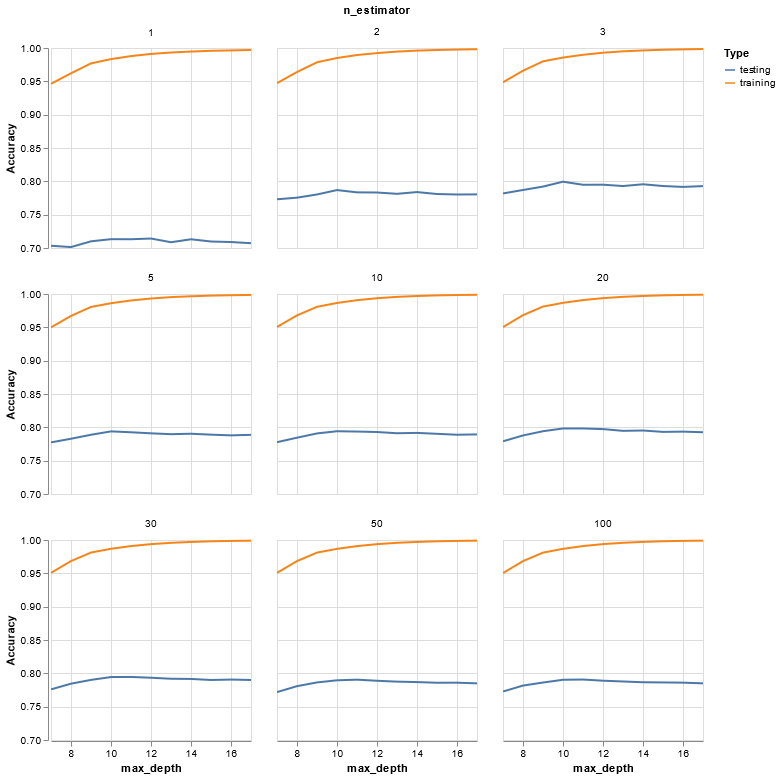

In [22]:
alt.Chart(df_rf).mark_line().encode(
    alt.X('max_depth'),
    alt.Y('Accuracy', scale=alt.Scale(domain=[0.7, 1])),
    alt.Color('Type'),
    alt.Facet('n_estimator')
    ).properties(width = 200, height = 200, columns = 3)

## SVR

kernel="rbf", C=100, gamma=0.1, epsilon=0.1

https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html

In [17]:
def svr_rbf(df):
    X_train, X_test, y_train, y_test = test_train_compound(df)
    print("The 4 matrices are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    svr_rbf = SVR(kernel="rbf").fit(X_train, y_train)
    
    df_pred = df.copy()
    df_pred['predicted_wt'] = svr_rbf.predict(df[["wave", "temp", "time"]])
    df_pred.to_csv('../output/scenario3/prediction_svr_rbf.csv')
    
    print("The training accuracy for the model is ", svr_rbf.score(X_train, y_train))
    print("The testing accuracy for the model is ", svr_rbf.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'SVR RBF Kernel',
                           'Train Accuracy': svr_rbf.score(X_train, y_train),
                           'Test Accuracy' : svr_rbf.score(X_test, y_test)}, index=[None])

df_results = df_results.append(svr_rbf(df))

The 4 matrices are of sizes:  (26460, 3) (35280, 3) (26460,) (35280,)
The training accuracy for the model is  0.11639332452234175
The testing accuracy for the model is  0.031202160899373887


## GBR

In [18]:
def gbr(df):
    X_train, X_test, y_train, y_test = test_train_compound(df)
    print("The 4 matrices are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    gbr = GradientBoostingRegressor().fit(X_train,y_train)
    
    df_pred = df.copy()
    df_pred['predicted_wt'] = gbr.predict(df[["wave", "temp", "time"]])
    df_pred.to_csv('../output/scenario3/prediction_gbr.csv')
    
    print("The training accuracy for the model is ", gbr.score(X_train, y_train))
    print("The testing accuracy for the model is ", gbr.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Gradient Boost Regressor',
                           'Train Accuracy': gbr.score(X_train, y_train),
                           'Test Accuracy' : gbr.score(X_test, y_test)}, index=[None])

df_results = df_results.append(gbr(df))

The 4 matrices are of sizes:  (26460, 3) (35280, 3) (26460,) (35280,)
The training accuracy for the model is  0.9715430704257842
The testing accuracy for the model is  0.7732256860475033


In [19]:
df_results

,Model,Compound,Train Accuracy,Test Accuracy
NaN,Linear Regression,NaN,0.120013,0.045340
NaN,Partial Least Squares (n=2),NaN,0.119914,0.048628
NaN,Partial Least Squares (n=3),NaN,0.120013,0.045340
NaN,Random Forest Regression (max_depth = 2),NaN,0.169503,0.084470
NaN,Random Forest Regression (max_depth = 5),NaN,0.867870,0.697103
NaN,Random Forest Regression (max_depth = 7),NaN,0.950410,0.772732
NaN,Random Forest Regression (max_depth = 10),NaN,0.986756,0.790332
NaN,Random Forest Regression (max_depth = 15),NaN,0.998113,0.786353
NaN,SVR RBF Kernel,NaN,0.116393,0.031202
NaN,Gradient Boost Regressor,NaN,0.971543,0.773226


In [20]:
# n_est = [1,2,3,5,10,20,30,50,100]
# max_depth = range(1,8)
# X_train, X_test, y_train, y_test = test_train_compound(df)
# trees = []
# train_acc = []
# test_acc = []
# depth = []
# for j in max_depth:
#     for i in n_est:
#         trees.append(i)
#         depth.append(j)
#         gbr = GradientBoostingRegressor(n_estimators = i, max_depth = j, random_state=0).fit(X_train, y_train)
#         train_acc.append(gbr.score(X_train, y_train))
#         test_acc.append(gbr.score(X_test, y_test))
#         print(j,i)
# df_gbr = pd.DataFrame({'training' : train_acc,
#                       'testing' : test_acc,
#                       'n_estimator' : trees,
#                       'max_depth' : depth})
# df_gbr = df_gbr.melt(id_vars = ['n_estimator', 'max_depth'], var_name = 'Type', value_name = 'Accuracy')
# df_gbr
# alt.Chart(df_gbr).mark_line().encode(
#     alt.X('n_estimator'),
#     alt.Y('Accuracy', scale=alt.Scale(domain=[0, 1])),
#     alt.Color('Type'),
#     alt.Facet('max_depth')
#     ).properties(width = 200, height = 200, columns = 3)

## Write results to file

In [21]:
df_results.to_csv('../output/scenario3/results_table.csv')